## Categorical Feature Selection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


In [21]:
injuries.dtypes

PlayerName                            object
PlayerId                              object
PlayerDOB                     datetime64[ns]
Height                               float64
Weight                               float64
Positions                             object
GroupPosition                         object
DraftPick                            float64
IsActive                                bool
FirstSeason                            int64
LastSeason                             int64
SeasonsPlayed                          int64
TeamNameFull                          object
TeamLocation                          object
TeamName                              object
Season                                object
SeasonStartYear                        int64
SeasonEndYear                        float64
TeamMadePlayoffs                      object
DateInjured                   datetime64[ns]
DateReturned                  datetime64[ns]
GamesMissed                          float64
DaysInjure

In [2]:
injuries.head() 
injuries['InjuryDescription'].head(20) # illness and rest? short day injuries?
# features: strain? surgery?

0     surgery to repair torn abdominal muscle (out i...
1                           sore abdominal muscle (DNP)
2                 strained right abdominal muscle (DTD)
3                       strained abdominal muscle (DNP)
4          strained abdominal muscle (out indefinitely)
5                                abdominal injury (DTD)
6                              strained abdominal (DTD)
7         strained left abdominal / sports hernia (DTD)
8                          lower abdominal strain (DNP)
9                   abdominal strain (out indefinitely)
10                           sore lower abdominal (DTD)
11    abdominal injury / sports hernia / athletic pu...
12                             strained abdominal (DTD)
13            strained lower abdominal (out for season)
14                             strained abdominal (DTD)
15                      strained abdominal muscle (DNP)
16                      strained abdominal muscle (DNP)
17                          torn abdominal muscl

# BoxCox, Normality, Bartlett

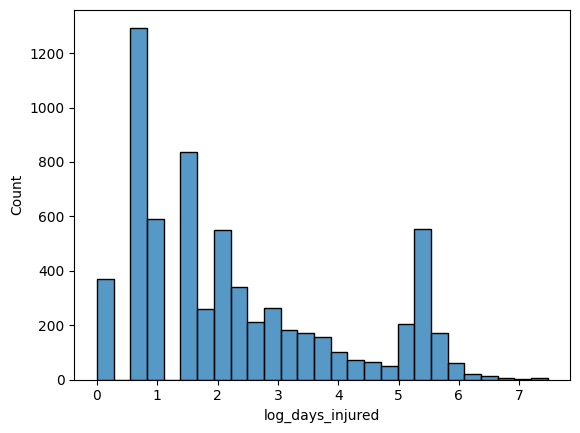

In [3]:
sns.histplot(injuries, x='log_days_injured')
plt.show()

In [4]:
print(injuries['GroupPosition'].unique())

G = injuries['log_days_injured'][injuries['GroupPosition'] == 'G']
F = injuries['log_days_injured'][injuries['GroupPosition'] == 'F']
C = injuries['log_days_injured'][injuries['GroupPosition'] == 'C']

groups =  [g.values for _, g in injuries.groupby('GroupPosition')['log_days_injured']]
stats.kruskal(*groups)


['G' 'F' 'C']


KruskalResult(statistic=np.float64(1.7673746381681803), pvalue=np.float64(0.4132562910340093))

In [22]:
def cat_box(col):
    order = injuries.groupby(col)['log_days_injured'].median().sort_values(ascending=False).index
    sns.boxplot(data=injuries, x='log_days_injured', y=col, order=order)
    plt.show()

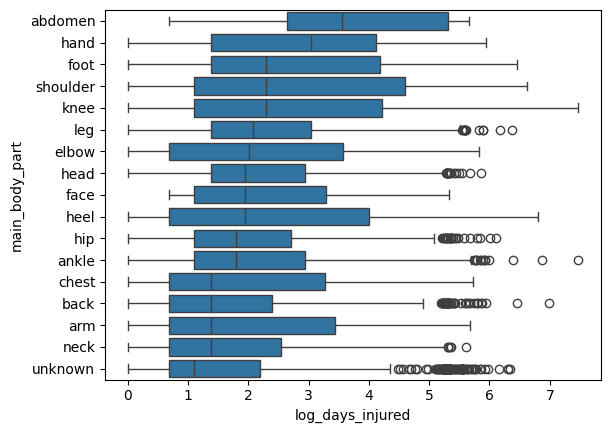

In [29]:
cat_box('main_body_part')


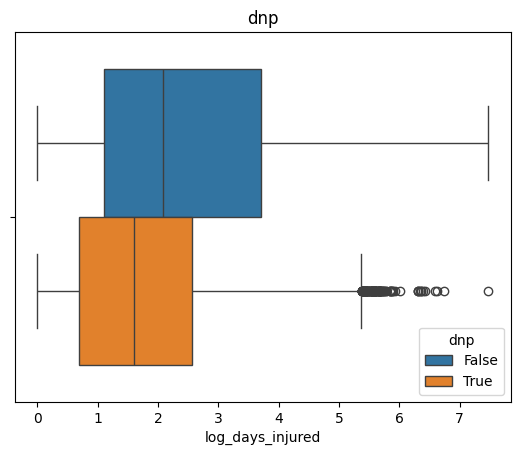

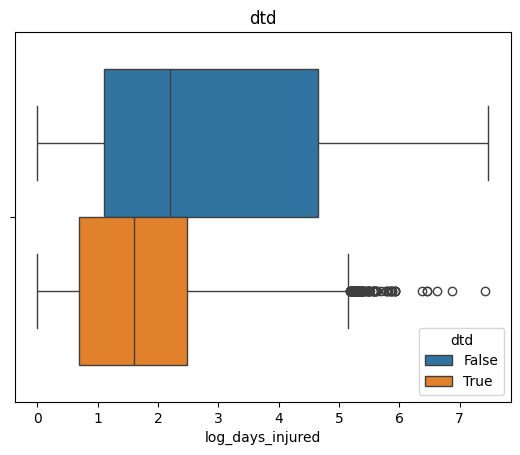

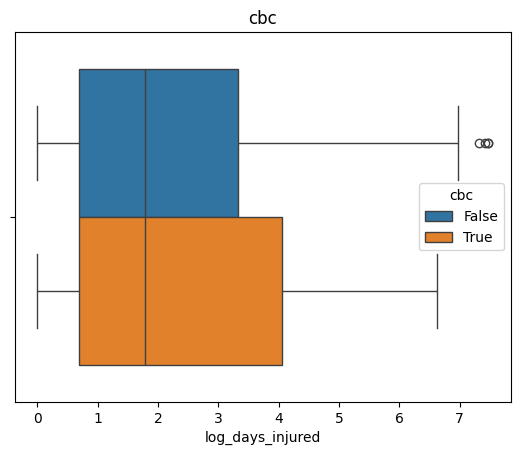

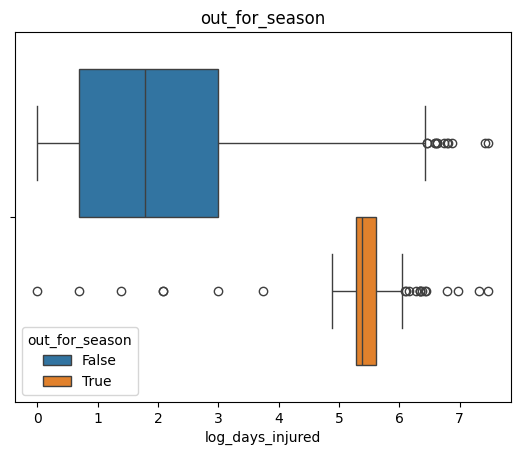

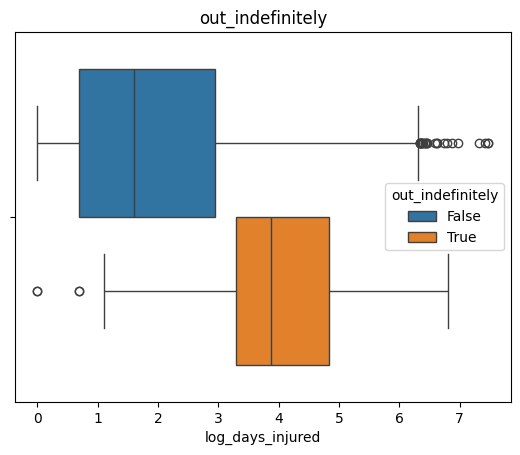

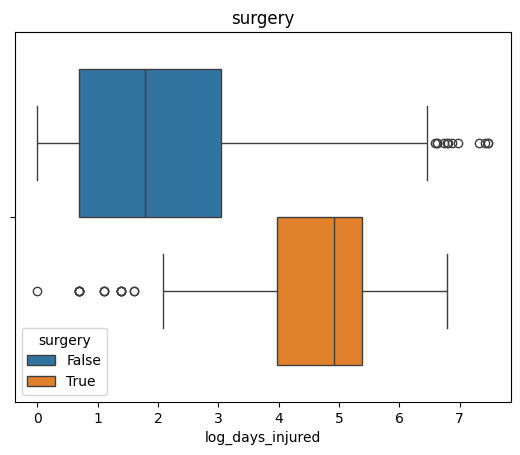

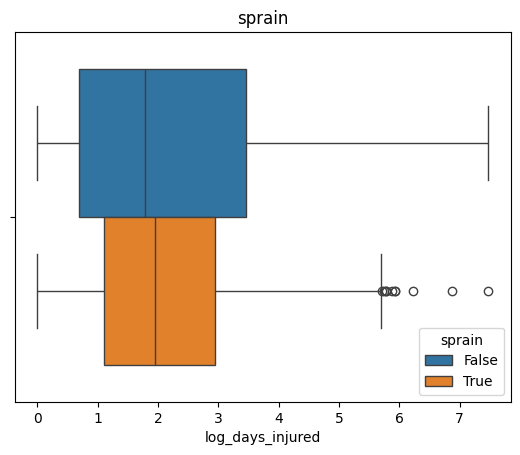

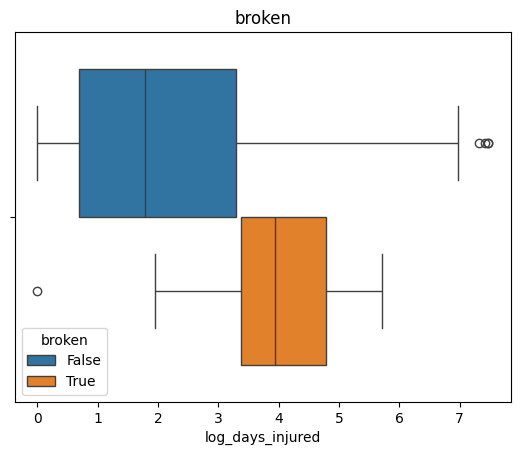

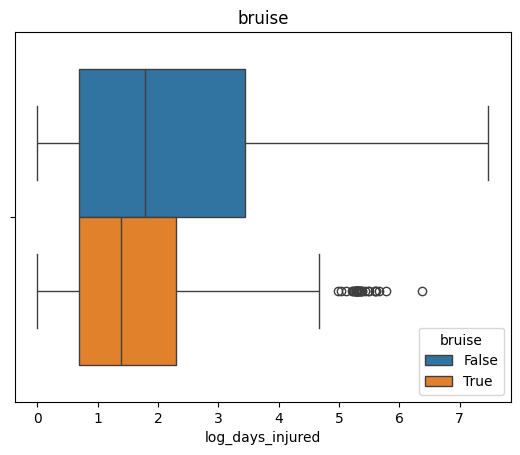

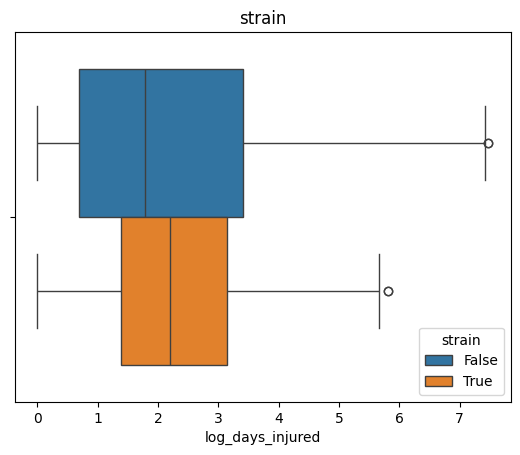

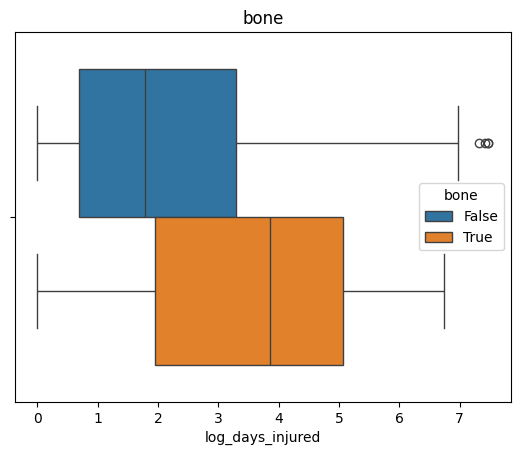

In [43]:
def bool_box(col):
    plt.title(col)
    sns.boxplot(data=injuries, x='log_days_injured', hue=col)
    plt.show()


bools = ['dnp', 'dtd', 'cbc', 'out_for_season', 'out_indefinitely', 'surgery', 'sprain', 'broken', 'bruise', 'strain', 'bone']

for b in bools:
    bool_box(b)